**РК №2 ТМО Падалко К.Р. ИУ5Ц-84Б**

## Датасет "Loan Default Prediction"

Ссылка на датасет: https://www.kaggle.com/kmldas/loan-default-prediction

#### Описание колонок
1. **index:** Индекс записи.
2. **employed:** Указывает, работает ли заемщик (1 - да, 0 - нет).
3. **bank balance:** Баланс на банковском счете.
4. **annual salary:** Годовая зарплата заемщика.
5. **defaulted?:** Указывает, произошел ли дефолт (1 - да, 0 - нет).

#### Подключение библиотеки и импорт данных

In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib
import matplotlib_inline
import matplotlib.pyplot as plt
from IPython.display import Image
from io import StringIO
import graphviz
import pydotplus
from sklearn.model_selection import train_test_split
%matplotlib inline
sb.set(style="ticks")
from IPython.display import set_matplotlib_formats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import timeit
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc

#### Загрузка данных

In [2]:
# Загрузка датасета
try:
    df = pd.read_csv('Default_Fin.csv', delimiter=',')
    print('Загружен датасет')
except Exception as ex:
    print('Отсутствует датасет. Проверьте путь файла')
    print('Error:', ex)

Загружен датасет


#### Анализ данных
##### Изучение данных

In [3]:
# Выводим информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [4]:
# Привести названия всех колонок к нижнему регистру
df.columns = df.columns.str.lower()

In [5]:
# Первые 5 строк
df.head()

,index,employed,bank balance,annual salary,defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [6]:
# Последние 5 строк
df.tail()

,index,employed,bank balance,annual salary,defaulted?
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0
9999,10000,0,2411.04,202355.40,0


In [7]:
df.describe()

,index,employed,bank balance,annual salary,defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


Анализ описательной статистики
- **employed:** примерно 70% людей трудоустроены.
- **bank balance:** на банковском счете: большая часть людей имеет баланс на счете меньше 14 000.
- **anual salary:** существуют значительные различия в уровне зарплат, от минимальных до очень высоких (до почти 883 000).
- **defaulted:** только около 3% людей имеют дефолт по кредиту, что свидетельствует о сравнительно низком уровне риска дефолта в этой выборке.

#### Пропуски

In [8]:
df.isna().sum()

index            0
employed         0
bank balance     0
annual salary    0
defaulted?       0
dtype: int64

В наборе нет пропусков, следовательно, не нужно их обрабатывать.

#### Дубликаты

In [9]:
# Подсчитаем количество дублирующих строк
duplicate_count = df.duplicated().sum()
print("Количество дублирующихся строк:", duplicate_count)

Количество дублирующихся строк: 0


В наборе нет дублирующих значений, следовательно, не нужно их обрабатывать.

#### Обработка категориальных признаков

In [10]:
pd.set_option("display.width", 70)

Нет категориальных значений, значит ненужно кодировать категориальных признаков.

#### Обучение и тестирование

In [11]:
# Кодирование категориальных признаков
categorical_features = []
numerical_features = ['employed', 'bank balance', 'annual salary']

In [12]:
# Создание колонного трансформера для обработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [13]:
# Определяем целевую переменную и признаки
X = df.drop('defaulted?', axis=1)  # 'defaulted?' - название целевой переменной
y = df['defaulted?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Метод 1: Логическая регрессия

In [14]:
# Создание пайплайна для логистической регрессии
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Обучение модели
logistic_pipeline.fit(X_train, y_train)

# Прогнозирование
y_pred_logistic = logistic_pipeline.predict(X_test)

# Оценка качества
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

print(f"Логистическая регрессия:\nAccuracy: {accuracy_logistic:.4f}\nF1 Score: {f1_logistic:.4f}")

Логистическая регрессия:
Accuracy: 0.9695
F1 Score: 0.3838


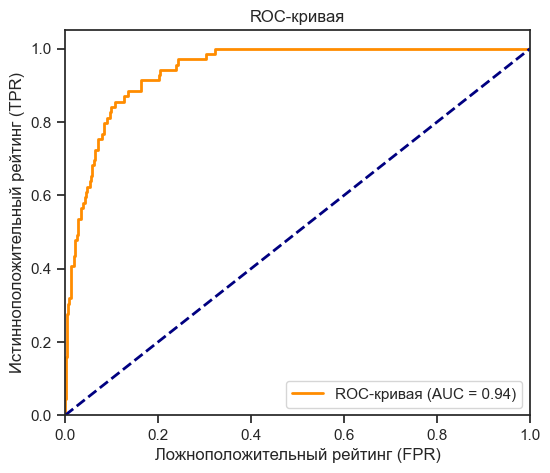

In [17]:
# Построение ROC-кривой и вычисление AUC
fpr, tpr, thresholds = roc_curve(y_test, logistic_pipeline.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительный рейтинг (FPR)')
plt.ylabel('Истинноположительный рейтинг (TPR)')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

#### 2. Градиентный бустинг

In [ ]:
# Создание пайплайна для градиентного бустинга
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

# Обучение модели
gb_pipeline.fit(X_train, y_train)

# Прогнозирование
y_pred_gb = gb_pipeline.predict(X_test)

# Оценка качества
accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print(f"Градиентный бустинг:\nAccuracy: {accuracy_gb:.4f}\nF1 Score: {f1_gb:.4f}")

Градиентный бустинг:
Accuracy: 0.9645
F1 Score: 0.3604


In [23]:
# Создание объекта AdaBoostClassifier с 4 базовыми моделями (n_estimators=4) и случайным начальным состоянием 42 (random_state=42).
ab = AdaBoostClassifier(n_estimators=4, random_state=42)
ab.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=4, random_state=42)

In [28]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

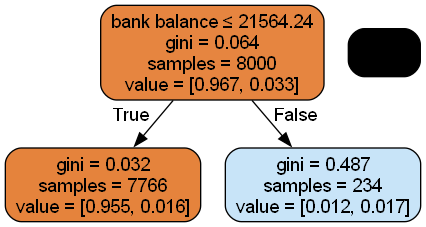

In [29]:
# Создание изображений структуры деревьев решений, обученных внутри модели AdaBoostClassifier.
Image(get_png_tree(ab.estimators_[0], X_train.columns), width="500")

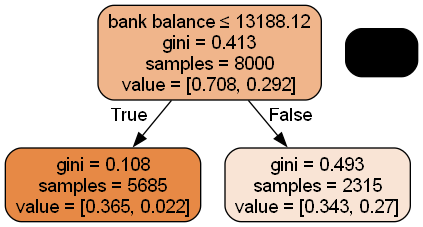

In [30]:
Image(get_png_tree(ab.estimators_[1], X_train.columns), width="500")

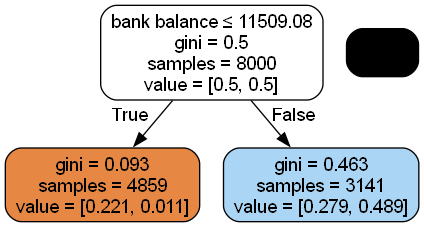

In [31]:
Image(get_png_tree(ab.estimators_[2], X_train.columns), width="500")

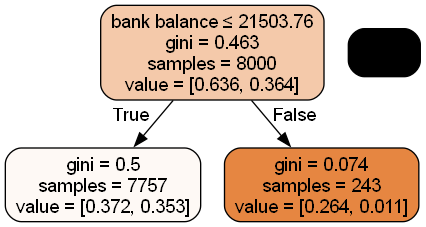

In [32]:
Image(get_png_tree(ab.estimators_[3], X_train.columns), width="500")

In [34]:
# Создание и обучение модели AdaBoostClassifier с 4 базовыми моделями и предсказывает значения на тестовом наборе данных.
y_pred_ab = ab.predict(X_test)
print('Средняя абсолютная точность AdaBoost:', accuracy_score(y_test, y_pred_ab))

Средняя абсолютная точность AdaBoost: 0.9635


#### Оценка качества моделей

In [36]:
# Оценка качества
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print(f"Логистическая регрессия:\nAccuracy: {accuracy_logistic:.4f}\nF1 Score: {f1_logistic:.4f}\n")
print(f"Градиентный бустинг:\nAccuracy: {accuracy_gb:.4f}\nF1 Score: {f1_gb:.4f}")

Логистическая регрессия:
Accuracy: 0.9695
F1 Score: 0.3838

Градиентный бустинг:
Accuracy: 0.9645
F1 Score: 0.3604


#### Вывод

Градиентный бустинг имеет несколько более низкие значения Accuracy и F1 Score, чем Логистическая регрессия, что указывает на то, что модель градиентного бустинга лучше справляется с задачей классификации.

Логистическая регрессия показывает более высокую точность, но её F1 Score заметно ниже, что может свидетельствовать о проблемах с балансом классов или недостаточной способности модели захватывать сложные зависимости между признаками и целевой переменной.

Градиентный бустинг лучше справляется с захватом более сложных нелинейных взаимосвязей между признаками и целевой переменной, что позволяет достигать лучшего качества классификации в условиях, когда логистическая регрессия может быть ограничена своими предположениями о линейности модели.

Таким образом, при выборе модели для данной задачи предпочтительнее использовать градиентный бустинг, так как он предоставляет более сбалансированные результаты и может лучше учитывать сложные зависимости в данных.